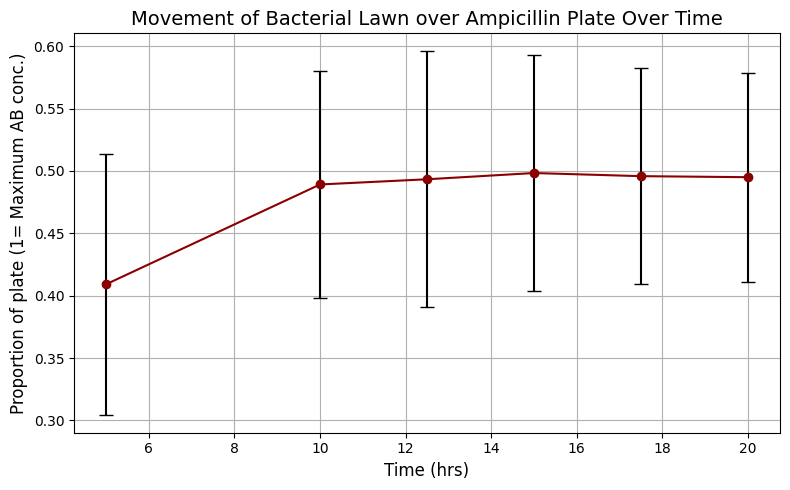

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace this with reading from Excel if needed)
data = {
    "Max_Conc": [29.2, 29.2, 29.2, 29.2, 29.2, 29.2, 29.2, 29.2, 26, 26, 26, 26],
    "hr_5_prop":  [1-0.56, 1-0.53, 1-0.45,1-0.42, 1-0.56, 1-0.69, 1-0.53, 1-0.55, 1-0.71, 1-0.70, 1-0.66, 1-0.73],
    "hr_10_prop": [1-0.45, 1-0.45, 1-0.41, 1-0.41, 1-0.51, 1-0.52, 1-0.44, 1-0.44, 1-0.64, 1-0.60, 1-0.63, 1-0.63],
    "hr_12.5_prop": [1-0.4, 1-0.35, 1-0.49, 1-0.47,1- 0.44,1- 0.43, 1-0.48,1- 0.48, 1-0.63,1- 0.63, 1-0.63,1- 0.65],
    "hr_15_prop": [1-0.45, 1-0.45,1- 0.47,1- 0.46, 1-0.39, 1-0.34,1- 0.50,1- 0.51,1- 0.61,1- 0.64,1- 0.62,1- 0.58],
    "hr_17.5_prop": [1-0.45, 1-0.44, 1-0.42, 1-0.41, 1-0.48, 1-0.49, 1-0.45, 1-0.44, 1-0.62, 1-0.61, 1-0.62, 1-0.62],
    "hr_20_prop": [1-0.41, 1-0.41, 1-0.42, 1-0.45, 1-0.51, 1-0.53, 1-0.46,1- 0.44,1- 0.60,1- 0.61, 1-0.61, 1-0.61]
}

df = pd.DataFrame(data)


# Calculate mean and standard deviation for each time point
timepoints = ["hr_5", "hr_10","hr_12.5", "hr_15", "hr_17.5", "hr_20"]
means = []
stds = []

for t in timepoints:
    mic_col = f"{t}_prop"
    means.append(df[mic_col].mean())
    stds.append(df[mic_col].std())

# Plotting
plt.figure(figsize=(8, 5))
hours = [5, 10, 12.5, 15, 17.5, 20]
plt.errorbar(hours, means, yerr=stds, fmt='o-', color='darkred', ecolor='black', capsize=5)
plt.xlabel("Time (hrs)", fontsize=12)
plt.ylabel("Proportion of plate (1= Maximum AB conc.)", fontsize=12)
plt.title("Movement of Bacterial Lawn over Ampicillin Plate Over Time", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Convert proportions to actual MICs
for col in df.columns[1:]:
   df[col.replace("_prop", "_MIC")] = df["Max_Conc"] * df[col]

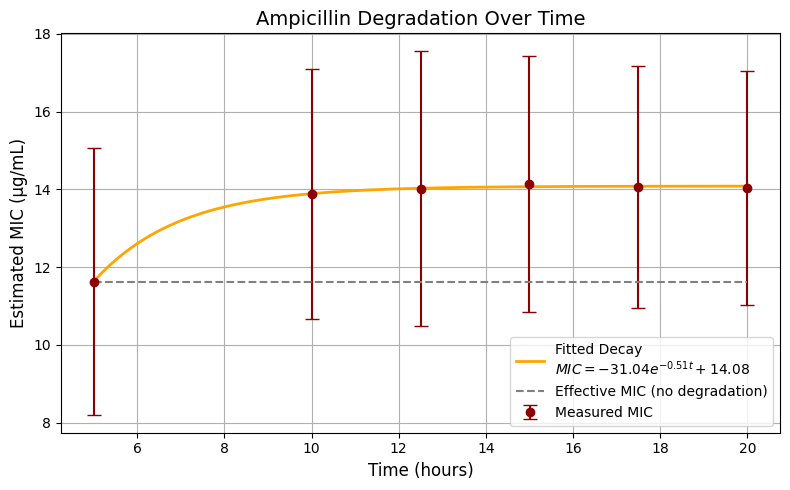

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Time points (hours)
times = np.array([5,10,12.5,15,17.5,20])

# Example MICs from earlier step
measured_means = np.array([df[f"hr_{hr}_MIC"].mean() for hr in [5,10,12.5,15,17.5,20]])
measured_stds  = np.array([df[f"hr_{hr}_MIC"].std()  for hr in [5,10,12.5,15,17.5,20]])

# --- Fit an exponential decay model ---
def exp_decay(t, a, k, c):
    return a * np.exp(-k * t) + c

params, _ = curve_fit(exp_decay, times, measured_means, p0=[5, 0.5, 0.5], maxfev=5000)
a, k, c = params

# --- Generate fitted curve ---
t_fine = np.linspace(5, 20, 300)
fitted = exp_decay(t_fine, *params)

# --- Optional: define a theoretical constant MIC if no degradation occurred ---
effective_mic = [measured_means[0]] * len(t_fine)

# --- Plotting --
plt.figure(figsize=(8, 5))
plt.errorbar(times, measured_means, yerr=measured_stds, fmt='o', label='Measured MIC', color='darkred', capsize=5)
plt.plot(t_fine, fitted, label=f'Fitted Decay\n$MIC = {a:.2f}e^{{-{k:.2f}t}} + {c:.2f}$', color='orange', lw=2)
plt.plot(t_fine, effective_mic, '--', label='Effective MIC (no degradation)', color='gray')

plt.xlabel("Time (hours)", fontsize=12)
plt.ylabel("Estimated MIC (µg/mL)", fontsize=12)
plt.title("Ampicillin Degradation Over Time", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
